In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
warnings.filterwarnings("ignore")

In [2]:
alpha = pd.read_csv("alpha.csv")
beta = pd.read_csv("beta.csv")
charlie = pd.read_csv("charlie.csv")

alpha = alpha.sample(frac=1, random_state=  42).reset_index(drop=True)
beta = beta.sample(frac=1,random_state=  42).reset_index(drop=True)
charlie = charlie.sample(frac=1,random_state=  42).reset_index(drop=True)


data = alpha.copy()#.append(beta).append(charlie).reset_index(drop=True)

In [3]:
data = data.drop(columns=["created_at","MG811_Digital","MQ7_Digital"])

# Drop rows where the value of 'column_name' is 0
#data = data.loc[data['CO'] != 0]


In [4]:
data.head()

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,CO
0,32.43,59.97,3502.0,1380.0,2641.0,1636.0,634.0,0.0
1,31.66,58.63,2863.0,1653.0,4456.0,3535.0,649.0,0.0
2,31.75,58.99,2848.0,1613.0,4390.0,2682.0,628.0,0.0
3,31.84,66.78,3853.0,2868.0,4169.0,3025.0,635.0,0.0
4,29.53,72.90,2504.0,3610.0,1479.0,2106.0,583.0,0.0


In [5]:
data.describe()

,Temperature,Humidity,MQ7_analog,MQ9_analog,MG811_analog,MQ135_analog,CO2,CO
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,31.816283,62.798316,3618.530206,2191.480455,4272.368870,2540.957001,610.360697,2.410448
std,1.240360,5.409263,1079.816647,964.512353,1334.190036,724.171077,16.145016,26.405375
min,27.630000,52.160000,2380.000000,1094.000000,1350.000000,1184.000000,573.000000,0.000000
25%,31.710000,58.890000,2861.000000,1497.000000,3168.250000,2063.250000,599.000000,0.000000
50%,31.900000,61.435000,3329.000000,1725.500000,4415.000000,2679.000000,607.000000,0.000000
75%,32.537500,66.830000,3990.250000,2808.000000,5177.000000,2929.000000,620.000000,0.000000
max,33.850000,77.300000,9544.000000,7823.000000,7919.000000,5594.000000,677.000000,544.000000


In [6]:
target = data.CO2
data = data.drop(["CO2", "CO"], axis = 1)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Create a list to store the metrics for each model
metrics_data = []

# Random Forest - No Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['No Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Random Forest - MQ7 Failure

# Step 2: Build the Random Forest regression model
#---------rf_model = Random ForestRegressor()
#---------rf_model.fit(X_train.drop("MQ7_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test1 = X_test.copy()
X_test1["MQ7_analog"] = 5000#np.nan
y_pred = rf_model.predict(X_test1)
print(X_test1.head())

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ7 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])





# Random Forest - MG811 Failure
# Step 2: Build the Random Forest regression model
#------rf_model = Random ForestRegressor()
#---rf_model.fit(X_train.drop("MG811_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test2 = X_test.copy()
X_test2["MG811_analog"] = 5000#np.nan
y_pred = rf_model.predict(X_test2)
print(X_test2.head())

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MG811 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])



# Random Forest - MQ9 Failure
# Step 2: Build the Random Forest regression model
#rf_model = Random ForestRegressor()
#rf_model.fit(X_train.drop("MQ9_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test3 = X_test.copy()
X_test3["MQ9_analog"] = 5000#np.nan
y_pred = rf_model.predict(X_test3)
print(X_test3.head())


y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ9 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])


# Random Forest - MQ135 Failure
# Step 2: Build the Random Forest regression model
#rf_model = Random ForestRegressor()
#rf_model.fit(X_train.drop("MQ135_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test4 = X_test.copy()
X_test4["MQ135_analog"] = 5000#np.nan
y_pred = rf_model.predict(X_test4)
print(X_test4.head())



y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ135 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Create a DataFrame to store the metrics
columns = ['Failed_sensor', 'MSE', 'RMSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Display the DataFrame
print(metrics_df)

      Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
450         31.63     57.71        5000      1607.0        4315.0   
1174        31.14     66.70        5000      3458.0        1690.0   
1192        32.73     58.13        5000      1770.0        4463.0   
2424        28.36     75.17        5000      2509.0        6174.0   
2664        33.41     54.83        5000      1501.0        4116.0   

      MQ135_analog  
450         2727.0  
1174        2055.0  
1192        2614.0  
2424        2593.0  
2664        2680.0  
      Temperature  Humidity  MQ7_analog  MQ9_analog  MG811_analog  \
450         31.63     57.71      2839.0      1607.0          5000   
1174        31.14     66.70      2427.0      3458.0          5000   
1192        32.73     58.13      3126.0      1770.0          5000   
2424        28.36     75.17      4916.0      2509.0          5000   
2664        33.41     54.83      2651.0      1501.0          5000   

      MQ135_analog  
450         2727.0  
11

In [8]:
metrics_df2 = metrics_df.copy() ##.drop("MSE", axis=1)

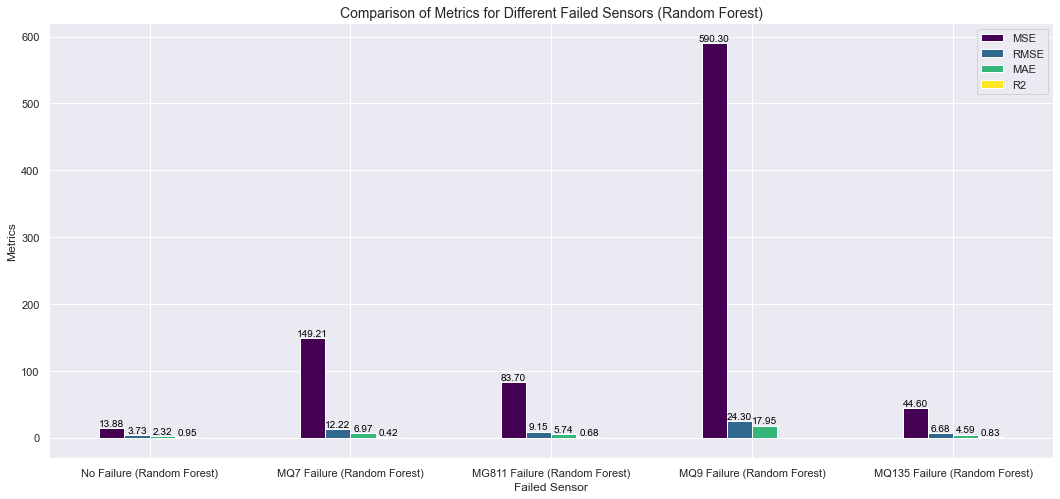

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Set the "Failed_sensor" column as the index for easier plotting
metrics_df = metrics_df2.copy()
metrics_df.set_index('Failed_sensor', inplace=True)

# Set a larger plot size using seaborn
sns.set(rc={'figure.figsize': (18, 8)})  # You can adjust the width and height as needed

# Create a grouped bar plot with log scale on the y-axis
ax = metrics_df.plot(kind='bar', logy=False, colormap='viridis', rot=0)
plt.xlabel('Failed Sensor', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Metrics for Different Failed Sensors (Random Forest)', fontsize=14)

# Add scores on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # To avoid adding scores to empty bars (in case of log scale)
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
        
plt.savefig('Comparison of Metrics for Different Failed Sensors (Random Forest)', bbox_inches='tight')    
        

# Show the plot
plt.show()


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Create a list to store the metrics for each model
metrics_data = []

# Random Forest - No Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['No Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Random Forest - MQ7 Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop("MQ7_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test1 = X_test.drop(columns=["MQ7_analog"])
y_pred = rf_model.predict(X_test1)
print(X_test1.head())

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ7 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])





# Random Forest - MG811 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop("MG811_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test2 = X_test.drop(columns=["MG811_analog"])
y_pred = rf_model.predict(X_test2)
print(X_test2.head())

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MG811 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])



# Random Forest - MQ9 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop("MQ9_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test3 = X_test.drop(columns=["MQ9_analog"])
y_pred = rf_model.predict(X_test3)
print(X_test3.head())


y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ9 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])


# Random Forest - MQ135 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop("MQ135_analog", axis=1), y_train)

# Step 3: Make predictions on the test set
X_test4 = X_test.drop(columns=["MQ135_analog"])
y_pred = rf_model.predict(X_test4)
print(X_test4.head())



y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ135 Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Create a DataFrame to store the metrics
columns = ['Failed_sensor', 'MSE', 'RMSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Display the DataFrame
print(metrics_df)

      Temperature  Humidity  MQ9_analog  MG811_analog  MQ135_analog
450         31.63     57.71      1607.0        4315.0        2727.0
1174        31.14     66.70      3458.0        1690.0        2055.0
1192        32.73     58.13      1770.0        4463.0        2614.0
2424        28.36     75.17      2509.0        6174.0        2593.0
2664        33.41     54.83      1501.0        4116.0        2680.0
      Temperature  Humidity  MQ7_analog  MQ9_analog  MQ135_analog
450         31.63     57.71      2839.0      1607.0        2727.0
1174        31.14     66.70      2427.0      3458.0        2055.0
1192        32.73     58.13      3126.0      1770.0        2614.0
2424        28.36     75.17      4916.0      2509.0        2593.0
2664        33.41     54.83      2651.0      1501.0        2680.0
      Temperature  Humidity  MQ7_analog  MG811_analog  MQ135_analog
450         31.63     57.71      2839.0        4315.0        2727.0
1174        31.14     66.70      2427.0        1690.0       

In [11]:
metrics_df2 = metrics_df.copy()

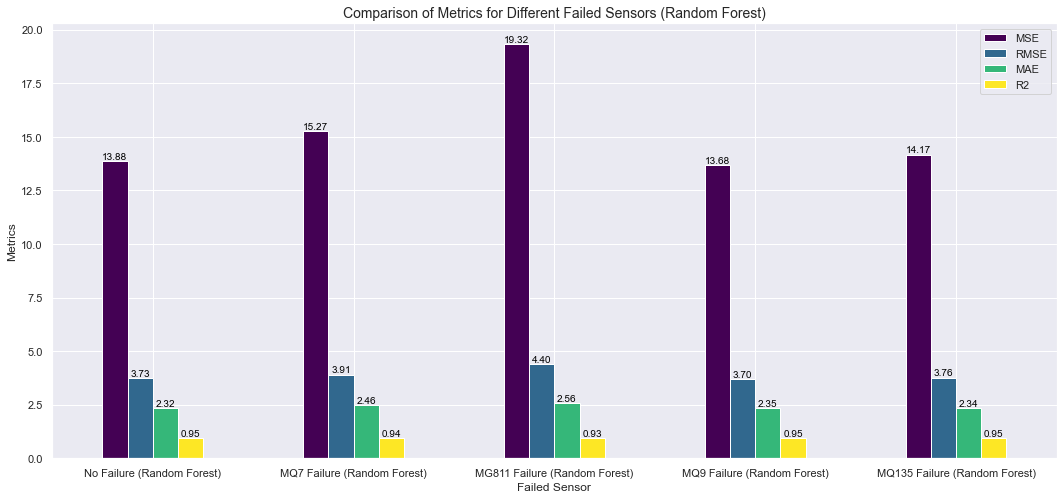

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Set the "Failed_sensor" column as the index for easier plotting
metrics_df = metrics_df2.copy()
metrics_df.set_index('Failed_sensor', inplace=True)

# Set a larger plot size using seaborn
sns.set(rc={'figure.figsize': (18, 8)})  # You can adjust the width and height as needed

# Create a grouped bar plot with log scale on the y-axis
ax = metrics_df.plot(kind='bar', logy=False, colormap='viridis', rot=0)
plt.xlabel('Failed Sensor', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Metrics for Different Failed Sensors (Random Forest)', fontsize=14)

# Add scores on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # To avoid adding scores to empty bars (in case of log scale)
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.savefig('Comparison of Metrics for Different Failed Sensors (Random Forest)', bbox_inches='tight') 
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Create a list to store the metrics for each model
metrics_data = []

# Random Forest - No Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['No Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Random Forest - MQ7 Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ7_analog","MG811_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ7_analog","MG811_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ7 + MG811 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])





# Random Forest - MG811 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MG811_analog","MQ135_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MG811_analog","MQ135_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MG811 + MQ135 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])



# Random Forest - MQ9 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ9_analog","MQ7_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ9_analog","MQ7_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ9 + MQ7 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])


# Random Forest - MQ135 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ135_analog","MQ7_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ135_analog","MQ7_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ135 + MQ7 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])

# Create a DataFrame to store the metrics
columns = ['Failed_sensor', 'MSE', 'RMSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Display the DataFrame
print(metrics_df)

                Failed_sensor        MSE      RMSE       MAE        R2
0  No Failure (Random Forest)  13.883315  3.726032  2.321456  0.946431
1         MQ7 + MG811 Failure  27.915391  5.283502  2.772611  0.892288
2       MG811 + MQ135 Failure  19.923469  4.463571  2.647709  0.923125
3           MQ9 + MQ7 Failure  15.749307  3.968540  2.534991  0.939231
4         MQ135 + MQ7 Failure  16.122465  4.015279  2.490924  0.937791


In [14]:
metrics_df2 = metrics_df.copy()#.drop("MSE", axis=1)

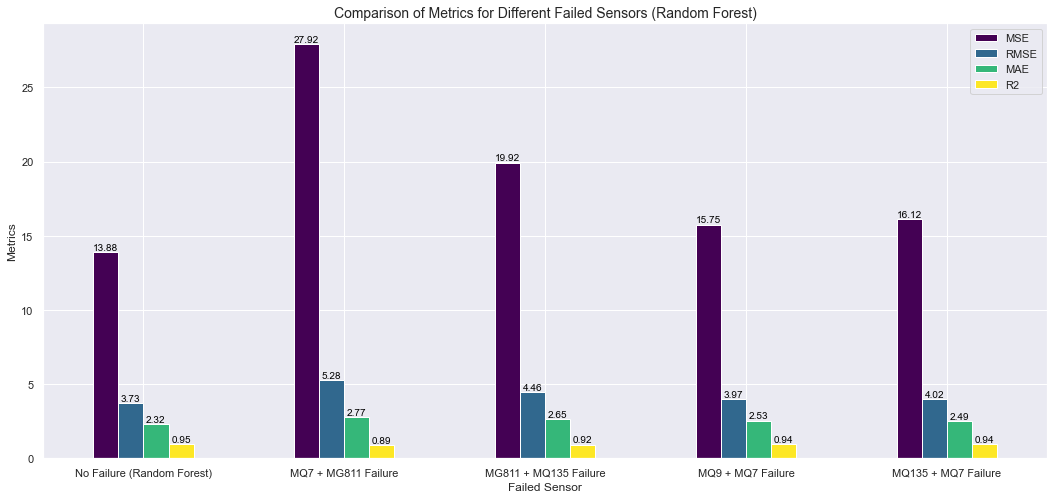

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Set the "Failed_sensor" column as the index for easier plotting
metrics_df = metrics_df2.copy()
metrics_df.set_index('Failed_sensor', inplace=True)

# Set a larger plot size using seaborn
sns.set(rc={'figure.figsize': (18, 8)})  # You can adjust the width and height as needed

# Create a grouped bar plot with log scale on the y-axis
ax = metrics_df.plot(kind='bar', logy=False, colormap='viridis', rot=0)
plt.xlabel('Failed Sensor', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Metrics for Different Failed Sensors (Random Forest)', fontsize=14)

# Add scores on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # To avoid adding scores to empty bars (in case of log scale)
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
        
plt.savefig('Comparison of Metrics for 2 Failed Sensors (Random Forest)', bbox_inches='tight') 

# Show the plot
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Create a list to store the metrics for each model
metrics_data = []

# Random Forest - No Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['No Failure (Random Forest)', mse_rf, rmse_rf, mae_rf, r2_rf])

# Random Forest - MQ7 Failure

# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ7_analog","MG811_analog", "MQ135_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ7_analog","MG811_analog","MQ135_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ7 + MG811 + MQ135 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])





# Random Forest - MG811 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MG811_analog","MQ135_analog", "MQ7_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MG811_analog","MQ135_analog", "MQ7_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MG811 + MQ135 + MQ7 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])



# Random Forest - MQ9 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ9_analog","MQ7_analog","MG811_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ9_analog","MQ7_analog","MG811_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ9 + MQ7 + MG811 Failure', mse_rf, rmse_rf, mae_rf, r2_rf])


# Random Forest - MQ135 Failure
# Step 2: Build the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.drop(["MQ135_analog","MQ7_analog", "MG811_analog"], axis=1), y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test.drop(["MQ135_analog","MQ7_analog", "MG811_analog"], axis=1))

y_true_rf = y_test  # Replace with the true target values for the Random Forest model
y_pred_rf = y_pred  # Replace with the predicted target values for the Random Forest model
mse_rf, rmse_rf, mae_rf, r2_rf = calculate_metrics(y_true_rf, y_pred_rf)
metrics_data.append(['MQ135 + MQ7 + MG811 Failure ', mse_rf, rmse_rf, mae_rf, r2_rf])

# Create a DataFrame to store the metrics
columns = ['Failed_sensor', 'MSE', 'RMSE', 'MAE', 'R2']
metrics_df = pd.DataFrame(metrics_data, columns=columns)

# Display the DataFrame
print(metrics_df)


                  Failed_sensor        MSE      RMSE       MAE        R2
0    No Failure (Random Forest)  13.883315  3.726032  2.321456  0.946431
1   MQ7 + MG811 + MQ135 Failure  44.363331  6.660580  3.566057  0.828823
2   MG811 + MQ135 + MQ7 Failure  44.363331  6.660580  3.566057  0.828823
3     MQ9 + MQ7 + MG811 Failure  27.289923  5.223976  3.158581  0.894701
4  MQ135 + MQ7 + MG811 Failure   44.363331  6.660580  3.566057  0.828823


In [17]:
metrics_df2 = metrics_df.copy()#.drop("MSE", axis=1)

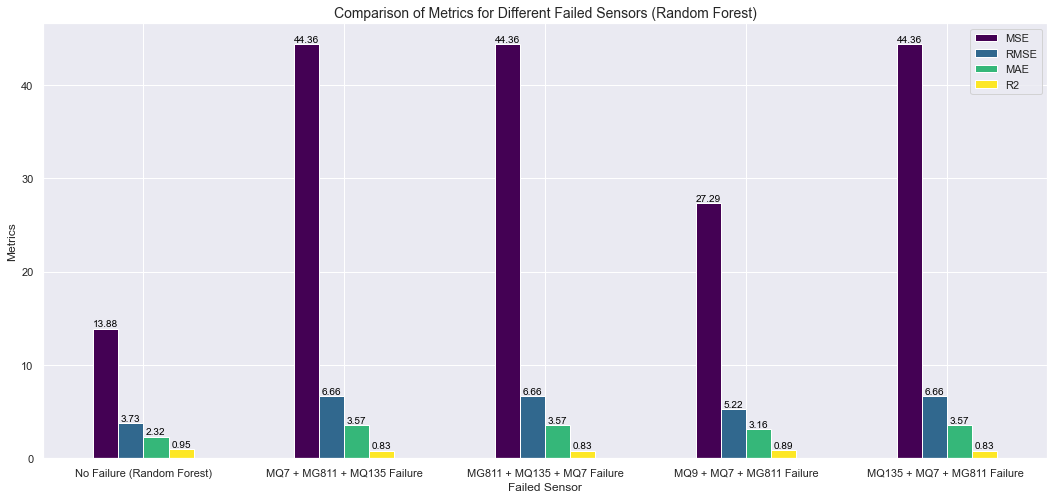

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'metrics_df' as shown above

# Set the "Failed_sensor" column as the index for easier plotting
metrics_df = metrics_df2.copy()
metrics_df.set_index('Failed_sensor', inplace=True)

# Set a larger plot size using seaborn
sns.set(rc={'figure.figsize': (18, 8)})  # You can adjust the width and height as needed

# Create a grouped bar plot with log scale on the y-axis
ax = metrics_df.plot(kind='bar', logy=False, colormap='viridis', rot=0)
plt.xlabel('Failed Sensor', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Metrics for Different Failed Sensors (Random Forest)', fontsize=14)

# Add scores on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # To avoid adding scores to empty bars (in case of log scale)
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
        
        
plt.savefig('Comparison of Metrics for 3 Failed Sensors (Random Forest)', bbox_inches='tight') 

# Show the plot
plt.show()
